In [44]:
import pandas as pd
import matplotlib.pyplot as plt

def date(row): 
    return row.date()

n = 1
month = ['January', 'February', 'March', 'April', 'May', 'June']
avg_month_ny = {}
avg_month_borough = {}
parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df_zone = pd.read_csv('taxi _zone_lookup.csv', usecols=[0,1], encoding = 'ISO-8859-1')

while(n<7):
    csv_path = "C://Users/giuli/Desktop/Algorithmic methods of Data Mining/2 Homework/Dataset taxi 2018/yellow_tripdata_2018-0"+str(n)+".csv"

    df_taxi= pd.read_csv(csv_path, usecols = [1,2,3,4,7,8,9,16], parse_dates = parse_dates, encoding = 'ISO-8859-1') 

    df_taxi = df_taxi[df_taxi['tpep_pickup_datetime'].dt.year == 2018]
    df_taxi = df_taxi[df_taxi['tpep_pickup_datetime'].dt.month == n]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'].dt.year == 2018]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'].dt.month <= n+1]

    df_join = pd.merge(df_taxi,df_zone, how = 'left', left_on=['PULocationID'], right_on=['LocationID'])
    
    del df_taxi

    df_join['date'] = df_join['tpep_pickup_datetime'].apply(date)
    
    date_borough = df_join.groupby(['date','Borough']).date.count()

    rows, col = df_join.shape
    
    del df_join
    
    avg_race_ny = round(rows/len(date_borough.keys().levels[0]),2)
    
    avg_month_ny[month[n-1]] = avg_race_ny

    date_borough_dict = date_borough.to_dict()
    races_borough = {}
    for i in date_borough_dict:
        if i[1] not in races_borough:
            races_borough[i[1]] = date_borough_dict[i]
        else: 
            races_borough[i[1]] += date_borough_dict[i]

    daily_races = {}
    for i in races_borough:
        daily_races[i] = round(races_borough[i]/len(date_borough.keys().levels[0]),2)
    
    avg_month_borough[month[n-1]] = daily_races
    
    n += 1


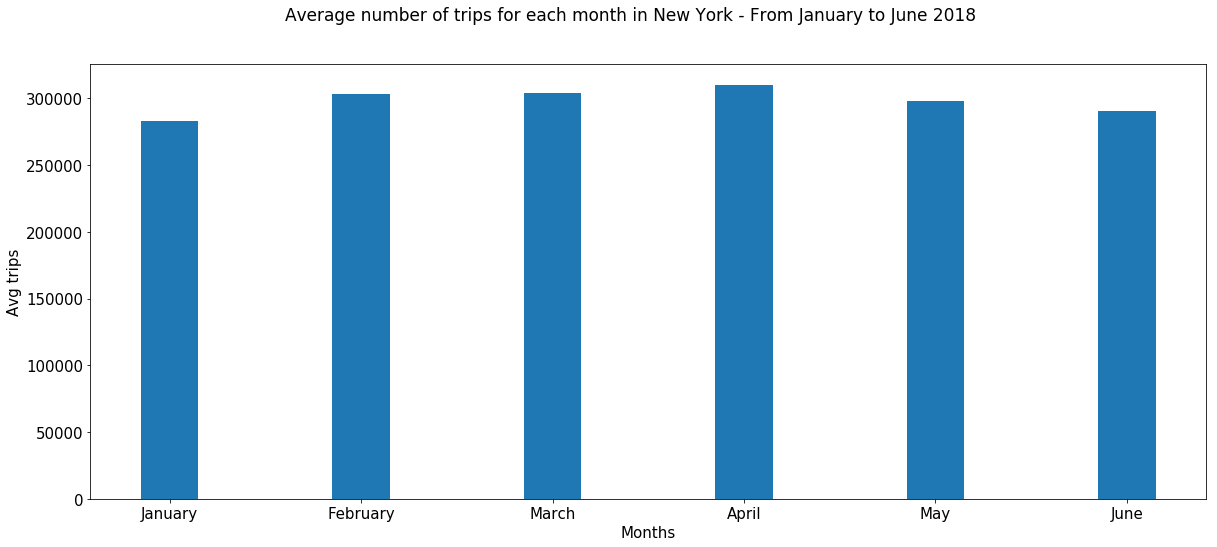

In [45]:
fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle('Average number of trips for each month in New York - From January to June 2018',fontsize = 17)
plt.bar(range(len(avg_month_ny)),list(avg_month_ny.values()), align = 'center',width = 0.3)
plt.xticks(range(len(avg_month_ny)),list(avg_month_ny.keys()))
ax.tick_params(labelsize=15)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Avg trips', fontsize=15)
plt.show()

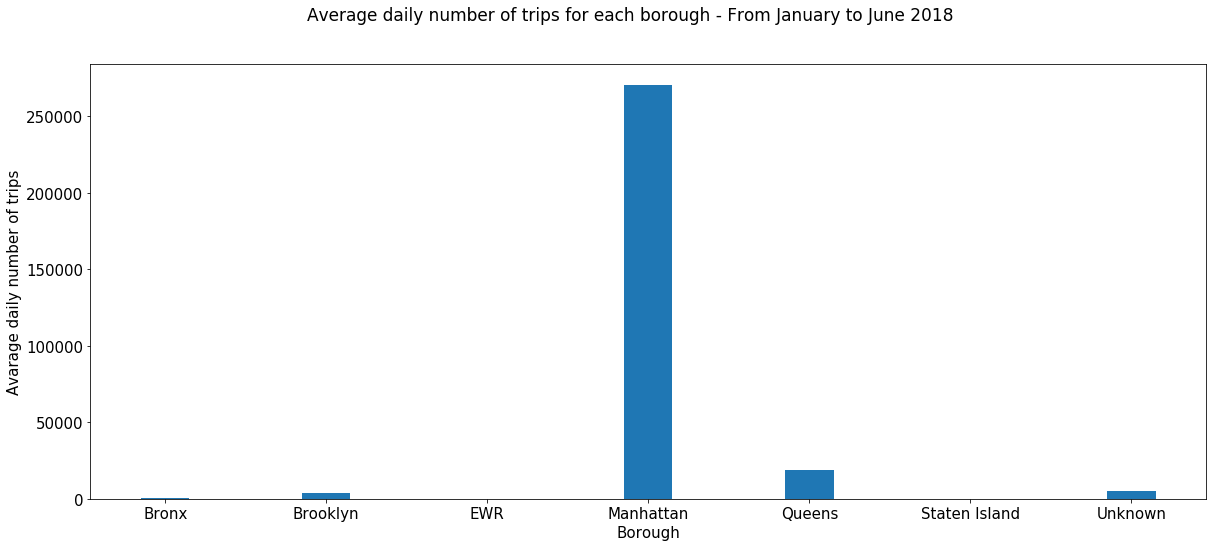

In [46]:
result = {}
for i in avg_month_borough: 
    for j in avg_month_borough[i]: 
        if j not in result: 
            result[j] = avg_month_borough[i][j]
        else: 
            result[j] += avg_month_borough[i][j]

for i in result: 
    result[i] = result[i]//6

fig, ax = plt.subplots(figsize=(20,8))
fig.suptitle('Average daily number of trips for each borough - From January to June 2018',fontsize = 17)
plt.bar(range(len(result)),list(result.values()), align = 'center',width = 0.3)
plt.xticks(range(len(result)),list(result.keys()))
ax.tick_params(labelsize=15)
plt.xlabel('Borough', fontsize=15)
plt.ylabel('Avarage daily number of trips', fontsize=15)
plt.show()